# Customer Churn Prediction Model


# BUSINESS UNDERSTANDING
In the fast-paced telecommunications industry, where consumers have a multitude of service provider options and frequently
switch operators, addressing customer churn has become a critical challenge. With an average annual churn rate 
of 15% to 25%, retaining existing customers is essential. The cost of acquiring new customers is approximately 
5 to 10 times higher than retaining current ones, making customer retention a primary business objective
for established operators.

To effectively reduce churn, telecom companies must proactively identify and predict customers at high risk of leaving.
Factors contributing to churn include poor customer service, product deficiencies, and pricing strategies. 
The impact of customer churn is significant, leading to increased product and acquisition costs, reduced referrals,
and a decrease in Customer Lifetime Value (CLV).

Amid economic instability, marked by rising interest rates, high inflation, and a weak job market, addressing churn is 
even more critical for telecommunications companies


# Problem Statements
1.Identify which customers have the highest possibility of switching telecos
2.Identify what features are likely to cause customers to churn 
3.To Identify a customer retention strategy 
4.To come up with the most effective model to help in predicting 

# Data Preperation

In [ ]:
# Importing libraries.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt
import shap
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
import dtreeviz.trees

In [6]:
#Loading the data into a pandas dataframe
df = pd.read_csv(r"C:\Users\User\Downloads\bigml_59c28831336c6604c800002a.csv")
df


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [7]:
def load_data(data):
    
    # Get the head of the DataFrame
    head = df.head()
    
    # Get the describe of the DataFrame
    describe = df.describe()
    
    # Get the shape of the DataFrame
    shape = df.shape
    
    return head, describe, shape

file_path = r"C:\Users\User\Downloads\bigml_59c28831336c6604c800002a.csv"
head, describe, shape = load_data(file_path)

# Print the information
print("Head:\n", head)
print("\nDescribe:\n", describe)
print("\nShape:", shape)


Head:
   state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...    

In [8]:
def load_data(data):
    
    # Check for null values
    null_values = df.isnull().sum()
    
    # Check for any missing values
    missing_values = df.isnull().any()
    
    # Check for duplicate rows
    duplicates = df.duplicated().sum()
    
    # Check for outliers using the IQR method
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
    
    return null_values, missing_values, duplicates, outliers

file_path = r"C:\Users\User\Downloads\bigml_59c28831336c6604c800002a.csv"
null_values, missing_values, duplicates, outliers = load_data(file_path)

# Print the information
print("\nNull Values:\n", null_values)
print("\nMissing Values:\n", missing_values)
print("\nDuplicates:", duplicates)
print("\nOutliers:\n", outliers)



Null Values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Missing Values:
 state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve call

there are no null values,Missing Values and duplicates

In [9]:
df.churn.value_counts(normalize=True)

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

we have 85% who have still retained their subscription and 14.5 % who have stopped their subscription.

# Exploratory Data Analysis

#Distribution of Churn by Area Code

Text(0.5, 0, 'Churn')

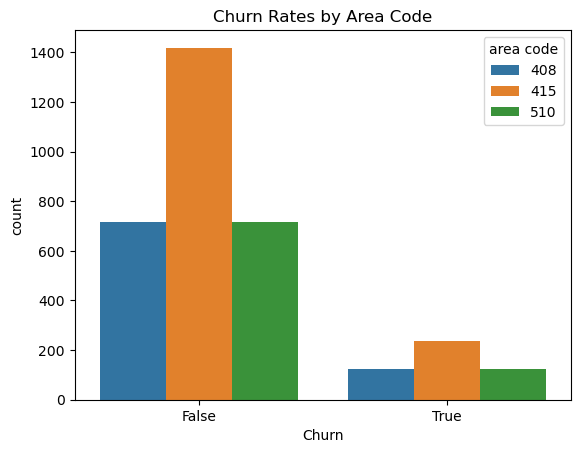

In [23]:
sns.countplot(x= 'churn', hue='area code', data = df)
plt.title('Churn Rates by Area Code')
plt.xlabel('Churn')